In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

In [ ]:
sheet1 = pd.read_excel('Data.csv')
sheet1['Assignment Score'] = sheet1.iloc[:,18:23].sum(axis=1)
sheet1['Class Attendance'] = sheet1.iloc[:,7:17].sum(axis=1)
sheet1

,Response,What is your gender,Year of study,The internet in my home is reliable in terms of signal strength,The internet in terms of signal strength on campus is reliable,The lighten system in my classroom and dormitory is reliable,The lighten system on campus is reliable,Class attendance checklist Monday,Class attendance checklist Tuesday,Class attendance checklist Wednesday,...,LMS attendance checklist (number of hours students chat tutors) (Wednesday),LMS attendance checklist (number of hours students chat tutors) (Thursday),LMS attendance checklist (number of hours students chat tutors) (Friday),LMS Assignments,LMS Quizzes,LMS access to notes checklist,What feature in the Learning management system contribute mostly in your academic performance and why?,How do you expect your academic performance to be improved by,Assignment Score,Class Attendance
0,1,1,3,4,3,3,1,1,1,1,...,1,1,1,1,1,1,CHAT,Governtment: Building of more lecture rooms an...,5,10
1,2,2,4,3,1,1,1,1,1,1,...,1,1,1,1,1,1,FORUMN,School authorities: They should continue to r...,5,10
2,3,1,2,4,2,3,3,1,0,0,...,1,1,1,1,1,1,ZOOM/VIDEO LECTURES,School authorities: To provide students handb...,5,8
3,4,1,2,2,2,1,2,1,1,1,...,1,1,1,1,1,1,FILE,Tutors: They should be always be regular and p...,5,10
4,5,1,2,2,2,2,2,1,1,1,...,1,1,1,1,1,1,CHAT,Government: The government should pay the allo...,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,172,2,2,2,2,1,1,1,1,1,...,1,1,1,1,1,1,ZOOM/VIDEO LECTURES,Tutors: Tutors must use a valid appropriate me...,5,10
171,173,2,2,1,2,2,1,1,1,1,...,1,1,1,1,1,1,ZOOM/VIDEO LECTURES,Government: The government shoulde provide a c...,5,10
172,174,2,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,CHAT,School authorities: The school must provide a ...,5,10
173,175,2,2,2,1,2,1,1,1,1,...,1,1,1,1,1,1,ZOOM/VIDEO LECTURES,Tutors: Tutors should consider the interest of...,5,10


In [ ]:
gen1 = pd.read_excel('Data.csv')
gen1['Class Attendance'] = gen1.iloc[:,7:17].sum(axis=1)
column_groups = [list(range(0, 30))]
gen1.drop(gen1.columns[column_groups], axis=1, inplace=True)
gen1

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Class Attendance
0,10
1,10
2,8
3,10
4,10
...,...
170,10
171,10
172,10
173,10


In [ ]:
gen2 = pd.read_excel('Data.csv')
gen2['Assignment Score'] = gen2.iloc[:,18:23].sum(axis=1)
column_groups = [list(range(0, 30))]
gen2.drop(gen2.columns[column_groups], axis=1, inplace=True)
gen2

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Assignment Score
0,5
1,5
2,5
3,5
4,5
...,...
170,5
171,5
172,5
173,5


In [ ]:
gen3 = pd.read_excel('Data.csv')
gen3['Internet'] = gen3.iloc[:,3:5].sum(axis=1)
column_groups = [list(range(0, 30))]
gen3.drop(gen3.columns[column_groups], axis=1, inplace=True)
gen3

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Internet
0,7
1,4
2,6
3,4
4,4
...,...
170,4
171,3
172,2
173,3


In [ ]:
combined_sheet = pd.concat([gen1, gen2, gen3], axis=1)
combined_sheet

,Class Attendance,Assignment Score,Internet
0,10,5,7
1,10,5,4
2,8,5,6
3,10,5,4
4,10,5,4
...,...,...,...
170,10,5,4
171,10,5,3
172,10,5,2
173,10,5,3


In [ ]:
scores = sheet1.columns[sheet1.columns.str.contains('gender')].tolist()
scores

['What is your gender']

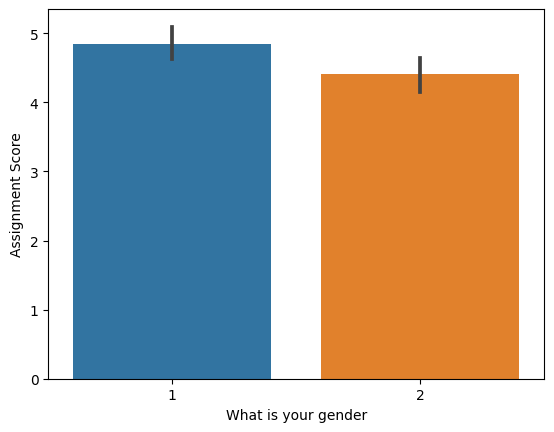

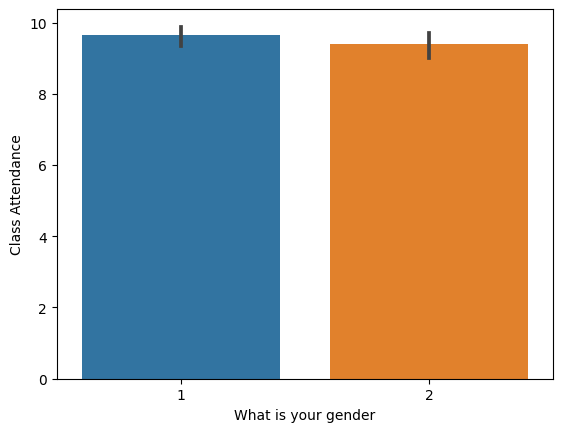

In [ ]:
for score in scores:
    sns.barplot(x=sheet1[score], y=sheet1['Assignment Score'])
    plt.show()

for score in scores:
    sns.barplot(x=sheet1[score], y=sheet1['Class Attendance'])
    plt.show()

In [ ]:
ct = sheet1.columns[sheet1.columns.str.contains('internet ')].tolist()
ct

['The internet in my home is reliable in terms of signal strength ',
 'The internet in terms of signal strength on campus is reliable ']

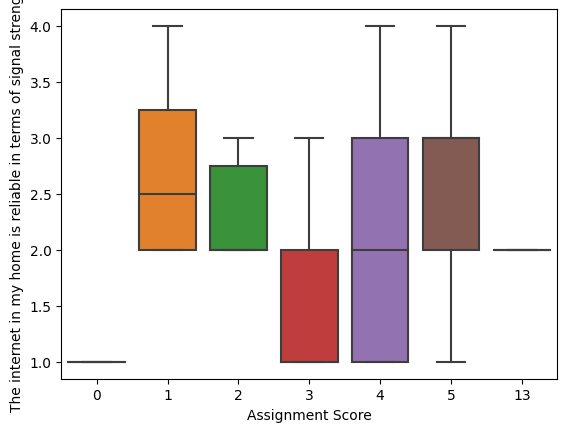

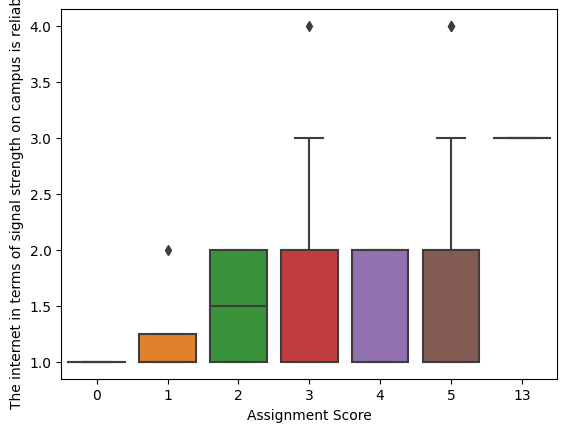

In [ ]:
for ct in ct:
    sns.boxplot(y=sheet1[ct], x=sheet1['Assignment Score'])
    plt.show()

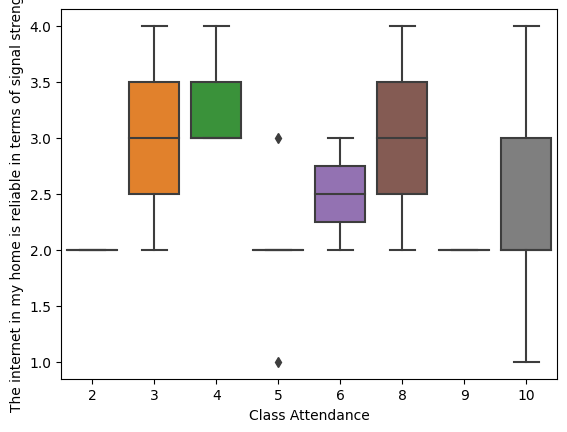

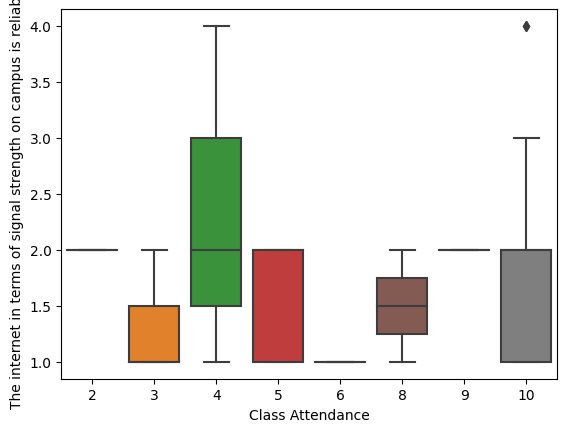

In [ ]:
for ct in ct:
    sns.boxplot(y=sheet1[ct], x=sheet1['Class Attendance'])
    plt.show()

In [ ]:
scores = sheet1.columns[sheet1.columns.str.contains('lighten ')].tolist()
scores

['The lighten system in my classroom and dormitory is reliable',
 'The lighten system on campus is reliable ']

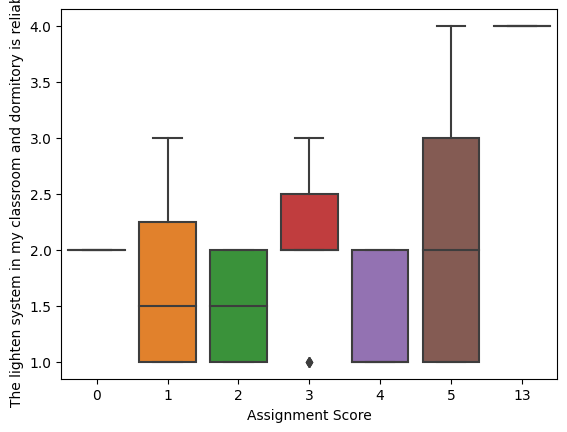

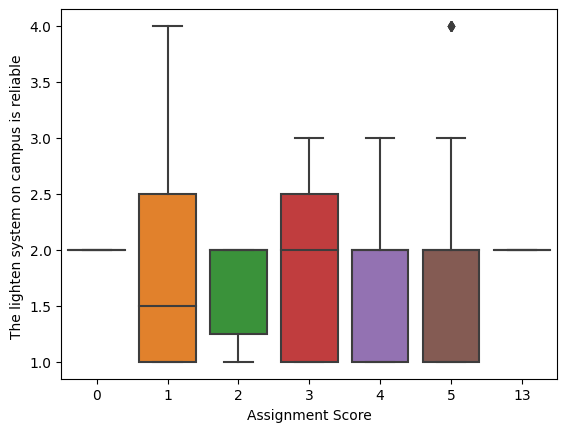

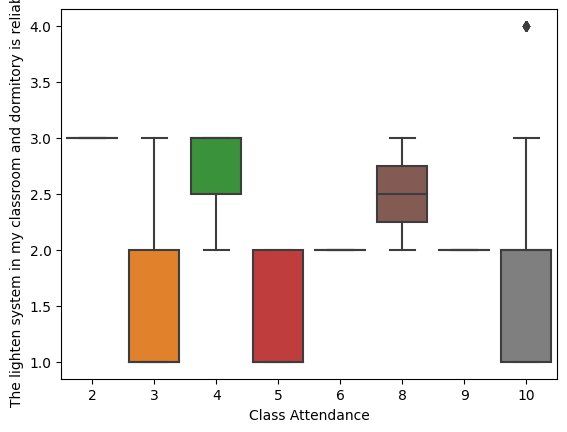

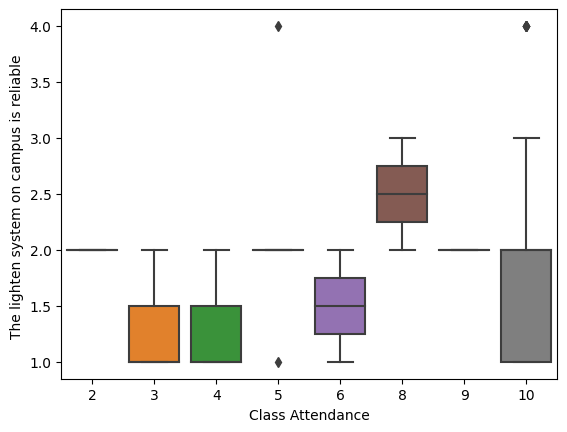

In [ ]:
for score in scores:
    sns.boxplot(y=sheet1[score], x=sheet1['Assignment Score'])
    plt.show()

for score in scores:
    sns.boxplot(y=sheet1[score], x=sheet1['Class Attendance'])
    plt.show()

In [ ]:
week1 = pd.read_excel('attendance 2.xlsx')
week1['Week Two Attendance'] = week1.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week1.drop(week1.columns[column_groups], axis=1, inplace=True)
week1

<ipython-input-19-02e988266fe8>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  week1['Week Two Attendance'] = week1.iloc[:, 1:16].sum(axis=1)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Week Two Attendance
0,13
1,11
2,8
3,13
4,13
...,...
170,13
171,13
172,13
173,13


In [ ]:
week2 = pd.read_excel('attendance 3.xlsx')
week2['Week Three Attendance'] = week2.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week2.drop(week2.columns[column_groups], axis=1, inplace=True)
week2

<ipython-input-20-cfbdad8aaa62>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  week2['Week Three Attendance'] = week2.iloc[:, 1:16].sum(axis=1)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Week Three Attendance
0,13
1,11
2,13
3,13
4,13
...,...
170,13
171,13
172,13
173,11


In [ ]:
week3 = pd.read_excel('attendance 4.xlsx')
week3['Week Four Attendance'] = week3.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week3.drop(week3.columns[column_groups], axis=1, inplace=True)
week3

<ipython-input-21-702151317871>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  week3['Week Four Attendance'] = week3.iloc[:, 1:16].sum(axis=1)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Week Four Attendance
0,12
1,12
2,14
3,9
4,14
...,...
170,12
171,14
172,14
173,13


In [ ]:
week5 = pd.read_excel('Week 6.xlsx')
week5['Week Six Attendance'] = week5.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week5.drop(week5.columns[column_groups], axis=1, inplace=True)
week5

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Week Six Attendance
0,14
1,14
2,14
3,14
4,15
...,...
170,13
171,14
172,14
173,15


In [ ]:
week4 = pd.read_excel('attendance 5.xlsx')
week4['Week Five Attendance'] = week4.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week4.drop(week4.columns[column_groups], axis=1, inplace=True)
week4

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Week Five Attendance
0,13
1,8
2,15
3,15
4,15
...,...
170,13
171,15
172,15
173,14


In [ ]:
week6 = pd.read_excel('Week 7.xlsx')
week6['Week Seven Attendance'] = week6.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week6.drop(week6.columns[column_groups], axis=1, inplace=True)
week6

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Week Seven Attendance
0,13
1,14
2,14
3,14
4,15
...,...
170,13
171,11
172,15
173,15


In [ ]:
combined_file = pd.concat([week1, week2, week3, week4, week5, week6, sheet1], axis=1)
combined_file['Total Attendance'] = combined_file.iloc[:, 1:17].sum(axis=1)
combined_file

,Week Two Attendance,Week Three Attendance,Week Four Attendance,Week Five Attendance,Week Six Attendance,Week Seven Attendance,Response,What is your gender,Year of study,The internet in my home is reliable in terms of signal strength,...,LMS attendance checklist (number of hours students chat tutors) (Thursday),LMS attendance checklist (number of hours students chat tutors) (Friday),LMS Assignments,LMS Quizzes,LMS access to notes checklist,What feature in the Learning management system contribute mostly in your academic performance and why?,How do you expect your academic performance to be improved by,Assignment Score,Class Attendance,Total Attendance
0,13,13,12,13,14,13,1,1,3,4,...,1,1,1,1,1,CHAT,Governtment: Building of more lecture rooms an...,5,10,85
1,11,11,12,8,14,14,2,2,4,3,...,1,1,1,1,1,FORUMN,School authorities: They should continue to r...,5,10,77
2,8,13,14,15,14,14,3,1,2,4,...,1,1,1,1,1,ZOOM/VIDEO LECTURES,School authorities: To provide students handb...,5,8,90
3,13,13,9,15,14,14,4,1,2,2,...,1,1,1,1,1,FILE,Tutors: They should be always be regular and p...,5,10,83
4,13,13,14,15,15,15,5,1,2,2,...,1,1,1,1,1,CHAT,Government: The government should pay the allo...,5,10,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,13,13,12,13,13,13,172,2,2,2,...,1,1,1,1,1,ZOOM/VIDEO LECTURES,Tutors: Tutors must use a valid appropriate me...,5,10,250
171,13,13,14,15,14,11,173,2,2,1,...,1,1,1,1,1,ZOOM/VIDEO LECTURES,Government: The government shoulde provide a c...,5,10,254
172,13,13,14,15,14,15,174,2,2,1,...,1,1,1,1,1,CHAT,School authorities: The school must provide a ...,5,10,257
173,13,11,13,14,15,15,175,2,2,2,...,1,1,1,1,1,ZOOM/VIDEO LECTURES,Tutors: Tutors should consider the interest of...,5,10,257


In [ ]:
combined_file.isna().sum()

Week Two Attendance                                                                                       0
Week Three Attendance                                                                                     0
Week Four Attendance                                                                                      0
Week Five Attendance                                                                                      0
Week Six Attendance                                                                                       0
Week Seven Attendance                                                                                     0
Response                                                                                                  0
What is your gender                                                                                       0
Year of study                                                                                             0
The internet in my home is r

In [ ]:
scores = combined_file.columns[combined_file.columns.str.contains('Total Attendance')].tolist()
scores

['Total Attendance']

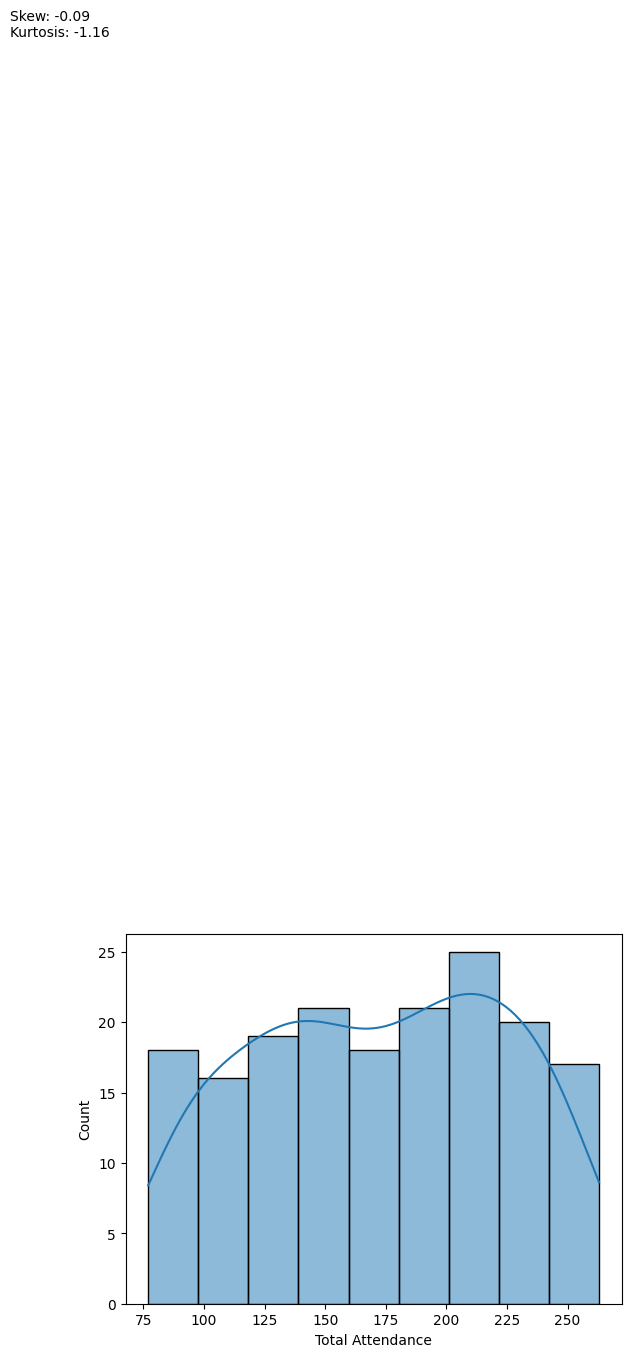

In [ ]:
for score in scores:
    sns.histplot(combined_file[score], element='bars', kde=True)
    plt.text(x=20, y=90, s=f"Skew: {round(combined_file[score].skew(),2)}\nKurtosis: {round(combined_file[score].kurt(),2)}")
    plt.show()

In [ ]:
combined_file.describe()

,Week Two Attendance,Week Three Attendance,Week Four Attendance,Week Five Attendance,Week Six Attendance,Week Seven Attendance,Response,What is your gender,Year of study,The internet in my home is reliable in terms of signal strength,...,LMS attendance checklist (number of hours students chat tutors) (Monday),LMS attendance checklist (number of hours students chat tutors) (Tuesday),LMS attendance checklist (number of hours students chat tutors) (Wednesday),LMS attendance checklist (number of hours students chat tutors) (Thursday),LMS attendance checklist (number of hours students chat tutors) (Friday),LMS Assignments,LMS access to notes checklist,Assignment Score,Class Attendance,Total Attendance
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,12.234286,12.480000,13.320000,14.182857,13.920000,14.045714,88.565714,1.514286,2.320000,2.428571,...,0.891429,0.885714,0.942857,0.902857,0.942857,0.937143,0.925714,4.622857,9.514286,172.000000
std,1.754132,1.294728,1.381487,1.462459,1.580921,1.258612,51.089677,0.501230,0.587612,0.860557,...,0.311993,0.319071,0.755929,0.297002,0.232781,0.243402,0.262988,1.191706,1.596898,51.786254
min,4.000000,6.000000,7.000000,5.000000,8.000000,8.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,77.000000
25%,13.000000,13.000000,13.000000,14.000000,14.000000,14.000000,44.500000,1.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,10.000000,129.500000
50%,13.000000,13.000000,14.000000,15.000000,14.000000,14.000000,89.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,10.000000,174.000000
75%,13.000000,13.000000,14.000000,15.000000,15.000000,15.000000,132.500000,2.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,10.000000,214.000000
max,13.000000,13.000000,14.000000,15.000000,15.000000,15.000000,176.000000,2.000000,4.000000,4.000000,...,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,13.000000,10.000000,263.000000


In [ ]:
gen3 = sheet1
column_groups = [(list(range(10, 30)))]
gen3.drop(gen3.columns[column_groups], axis=1, inplace=True)
gen3

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Response,What is your gender,Year of study,The internet in my home is reliable in terms of signal strength,The internet in terms of signal strength on campus is reliable,The lighten system in my classroom and dormitory is reliable,The lighten system on campus is reliable,Class attendance checklist Monday,Class attendance checklist Tuesday,Class attendance checklist Wednesday,Assignment Score,Class Attendance
0,1,1,3,4,3,3,1,1,1,1,5,10
1,2,2,4,3,1,1,1,1,1,1,5,10
2,3,1,2,4,2,3,3,1,0,0,5,8
3,4,1,2,2,2,1,2,1,1,1,5,10
4,5,1,2,2,2,2,2,1,1,1,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...
170,172,2,2,2,2,1,1,1,1,1,5,10
171,173,2,2,1,2,2,1,1,1,1,5,10
172,174,2,2,1,1,1,1,1,1,1,5,10
173,175,2,2,2,1,2,1,1,1,1,5,10


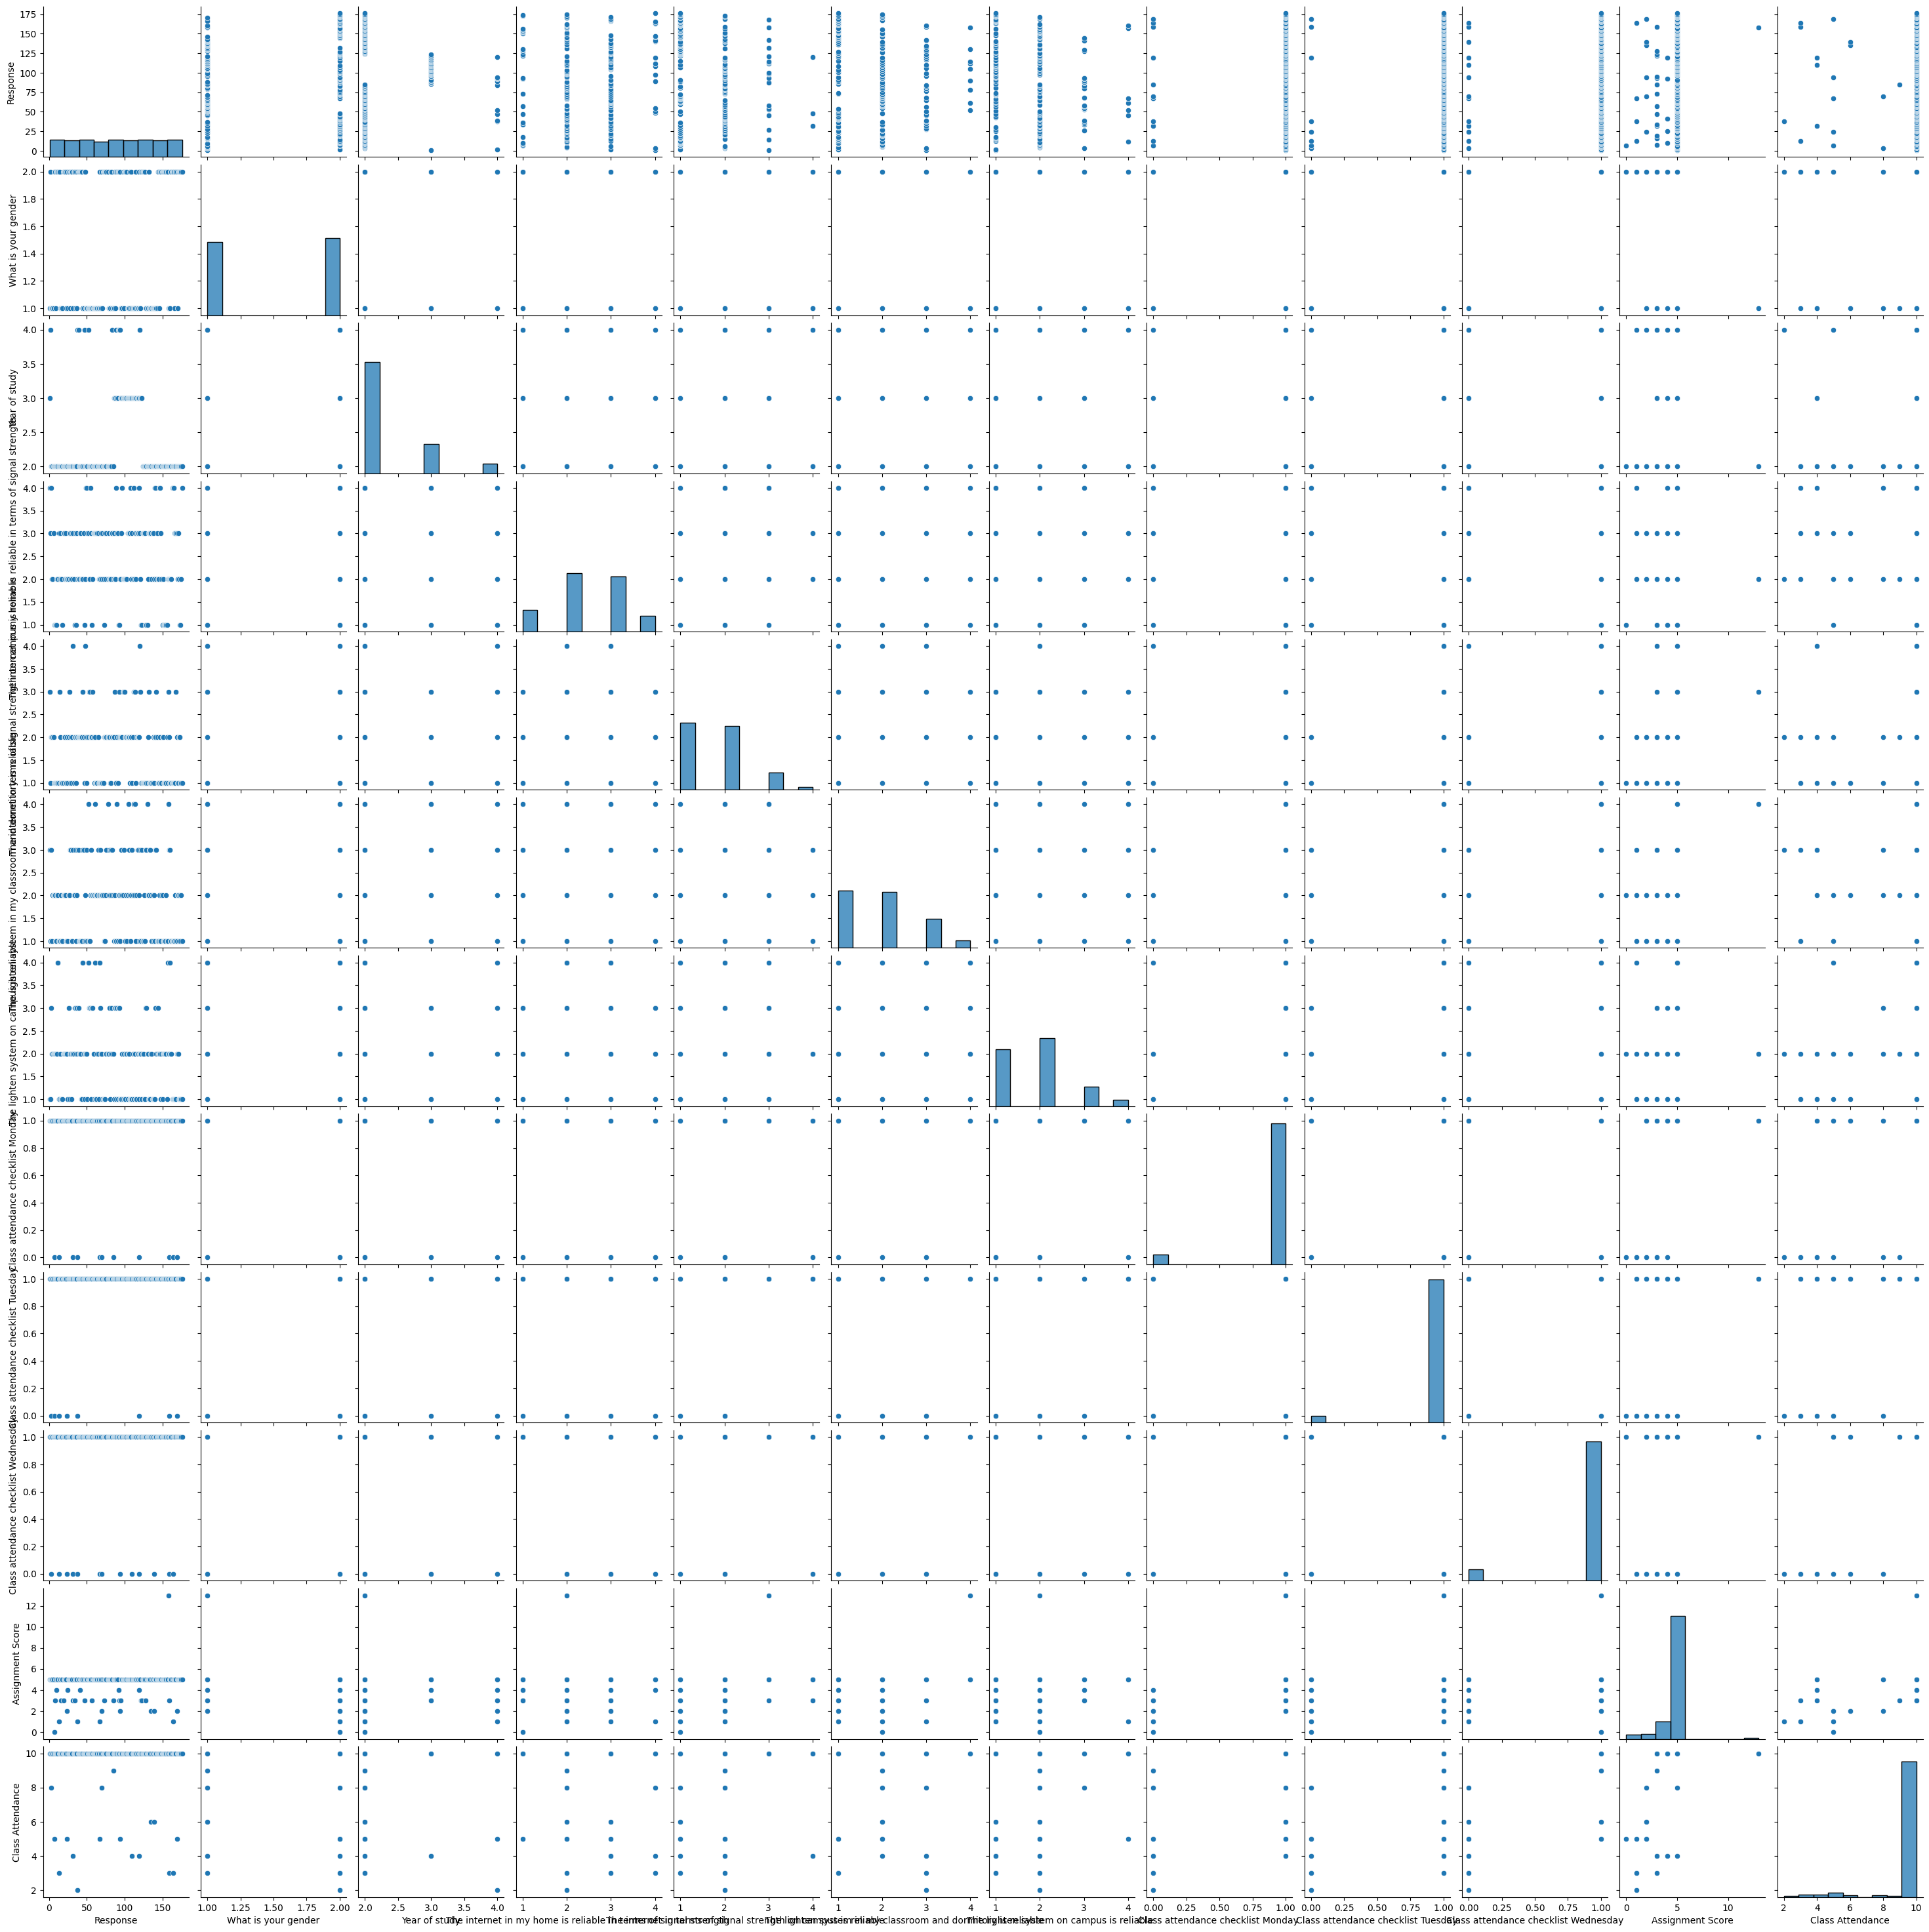

In [ ]:
sns.pairplot(data=gen3)

In [ ]:
X, y = gen3.drop('What is your gender', axis=1), gen3['What is your gender']

In [ ]:
cols = X.dtypes.index.tolist()
cols

['Response',
 'Year of study',
 'The internet in my home is reliable in terms of signal strength ',
 'The internet in terms of signal strength on campus is reliable ',
 'The lighten system in my classroom and dormitory is reliable',
 'The lighten system on campus is reliable ',
 'Class attendance checklist Monday ',
 'Class attendance checklist Tuesday',
 'Class attendance checklist Wednesday',
 'Assignment Score',
 'Class Attendance']

In [ ]:
ct = ColumnTransformer([
    # ('num', StandardScaler(), ['Assignment Score', 'Class Attendance']),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), cols)
], remainder='passthrough')

In [ ]:
ct.fit_transform(X).shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(175, 215)

In [ ]:
pipe = Pipeline([
    ('trf', ct),
    ('model', LGBMRegressor(random_state=0))
])

In [ ]:
params = {
    'model__n_estimators':[150,180,200,220,240],
    'model__boosting_type': ['dart', 'gbdt', 'goss']
}

In [ ]:
gs = GridSearchCV(pipe, param_grid=params, scoring='neg_root_mean_squared_error', n_jobs=-1)

In [ ]:
gs.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('trf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Response',
                                                                          'Year '
                                                                          'of '
                                                                          'study',
                                                                          'The '
                                                                          'internet '
                                                                          'in '
                                                                          'my '
                                                                          'home '
                                                                          'is '
                                                                          'reliable '
                                                                          'in '
                                                                          'terms '
                                                                          'of '
                                                                          'signal '
                                                                          'strength ',
                                                                          'The '
                                                                          'internet '
                                                                          'in '
                                                                          'terms '
                                                                          'of '
                                                                          'signal '
                                                                          'strength '
                                                                          'on '
                                                                          'campus '
                                                                          'is '
                                                                          'reliable ',
                                                                          'The '
                                                                          'l...
                                                                          'attendance '
                                                                          'checklist '
                                                                          'Monday ',
                                                                          'Class '
                                                                          'attendance '
                                                                          'checklist '
                                                                          'Tuesday',
                                                                          'Class '
                                                                          'attendance '
                                                                          'checklist '
                                                                          'Wednesday',
                                                                          'Assignment '
                                                                          'Score',
                                                                 

In [ ]:
# pd.DataFrame(gs.return_train_score).sort_values(by='rank_test_score')

In [ ]:
gs.best_params_

{'model__boosting_type': 'goss', 'model__n_estimators': 180}

In [ ]:
gs.best_score_

-0.49851424956830187

In [ ]:
gs.best_estimator_

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Response', 'Year of study',
                                                   'The internet in my home is '
                                                   'reliable in terms of '
                                                   'signal strength ',
                                                   'The internet in terms of '
                                                   'signal strength on campus '
                                                   'is reliable ',
                                                   'The lighten system in my '
                                                   'classroom and dormitory is '
                                                   'reliable',
                                                   'The lighten system on '
                                                   'campus is reliable ',
                                                   'Class attendance checklist '
                                                   'Monday ',
                                                   'Class attendance checklist '
                                                   'Tuesday',
                                                   'Class attendance checklist '
                                                   'Wednesday',
                                                   'Assignment Score',
                                                   'Class Attendance'])])),
                ('model',
                 LGBMRegressor(boosting_type='goss', n_estimators=180,
                               random_state=0))])

In [ ]:
joblib.dump(gs.best_estimator_, 'model.joblib')

['model.joblib']

In [24]:
mdl = joblib.load('model.joblib')

In [25]:
q = pd.DataFrame([[1, 4, 3, 4, 4, 1, 1, 1, 1, 10, 90]], columns=X.columns)
q

,Response,Year of study,The internet in my home is reliable in terms of signal strength,The internet in terms of signal strength on campus is reliable,The lighten system in my classroom and dormitory is reliable,The lighten system on campus is reliable,Class attendance checklist Monday,Class attendance checklist Tuesday,Class attendance checklist Wednesday,Assignment Score,Class Attendance
0,1,4,3,4,4,1,1,1,1,10,90


In [26]:
mdl.predict(q)

array([1.15141925])